## Convolution

Assume we have a function $f(t)$, and its observable $g(t)$. The observable has a delayed response, given by the kernel $h(t)$

$g(t) = \int_{-\infty}^{\infty}f(t-\tau)h(\tau)d\tau$

The kernel $h(t)$ is
* causal, meaning that $h(t)=0 \; \forall t<0$
* finite, meaning that $\int_{0}^{\infty}h(t)dt = C$ for some finite $C$

Given causality, we can adjust the integral to

$g(t) = \int_{0}^{\infty}f(t-\tau)h(\tau)d\tau$

## Unobserved Past

We will only be observing $g(t)$ within a finite time interval $t \in [0, T]$. However, its value will, in general, be affected by the previous values of $f(t)$. In order to proceed, we will assume that this is not the case, and that $f(t) = 0 \; \forall t < 0$. If this is not the case, we must make a reasonable assumption of the values of of $f(t)$ for $t<0$, and work with a new function

$\tilde{g}(t) = g(t) - \int_{t}^{\infty}f(t-\tau)h(\tau)d\tau$

We will assume that $\tilde{g}(t)$ is the observable function. Then

$\tilde{g}(t) = \int_{0}^{t}f(t-\tau)h(\tau)d\tau$

## Discretization

Time-observations cannot be performed continuously. A typical scenario would integrate the input signal over equally-spaced time intervals $\Delta t$, and then divide by $\Delta t$ to compute the average signal within each interval.

Let us
* Assume that $f(t)$ is a piecewise-constant function $f(t)=f_i$ where $i = \lfloor \frac{t}{\Delta t} \rfloor$
* Define $h_i = \int_{i\Delta t}^{(i+1)\Delta t}$
* Define $g_i = \tilde{g}(i\Delta t)$

Then the convolution becomes

$g_i = \sum_{j=0}^{i} f_{i-j} h_j = \sum_{j=0}^n H_{ij} f_j$

Where $H_{ij} = h_{i-j}\Theta(i\geq j)$ is the convolution matrix. We can thus solve the liner system for $f_i$.

In [1]:
# Noob experiment

# 1) Generate some fft random function
# 2) Compute its binned average given delta_t
# 3) Compute also its convolution given tau
# 4) Compute binned convolution for the same delta_t
# 5) Compute also binned kernel for the same delta_t
# 6) [Optional] Apply noise to the binned convolution
# 7) Apply scipy deconvolution method given binned convolution and binned kernel
# 8) Compare error between binned average and deconvolution, as function of tau and delta_t

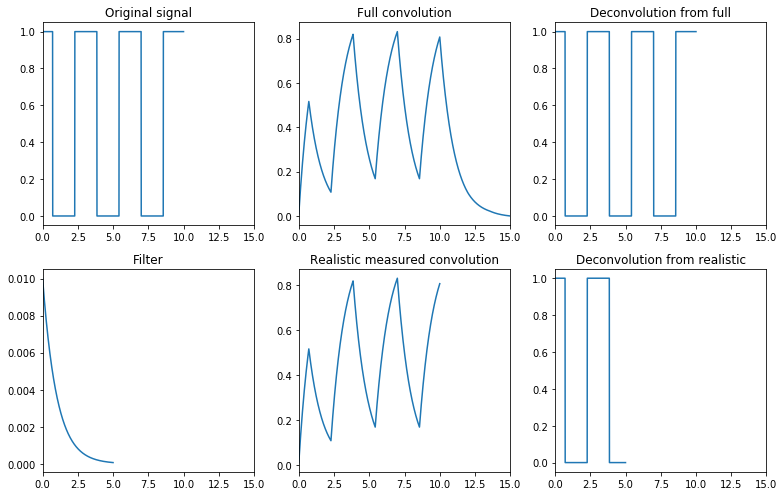

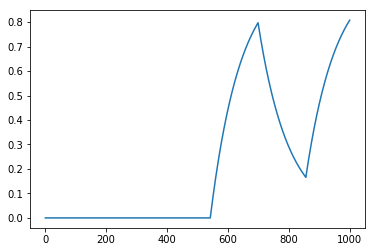

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

def exp_ker(t, tau):
    return np.exp(-t/tau)/tau

# Problem size
T_SIGNAL = 10
T_KERNEL = T_SIGNAL / 2

DT = 0.01
t_signal = np.arange(0, T_SIGNAL + DT, DT)
t_kernel = np.arange(0, T_KERNEL + DT, DT)
t_conv_full = np.arange(0, T_SIGNAL + T_KERNEL + DT, DT)
t_deconv_scipy = np.arange(0, T_SIGNAL - T_KERNEL + DT, DT)
NPOINT = len(t_signal)

# Box Signal
signal = np.zeros(NPOINT)
signal[np.sin(t_signal - 1.5)**2 > 0.5] = 1

# Kernel
TAU = 1.0
kernel = exp_ker(t_kernel, TAU)
kernel /= np.sum(kernel)

# Convolve
sig_conv_full = scipy.signal.convolve(signal, kernel, mode='full')
sig_conv_real = sig_conv_full[:NPOINT]

# Deconvolve
sig_deconv_full, sig_rem_full = scipy.signal.deconvolve(sig_conv_full, kernel)
sig_deconv_real, sig_rem_real = scipy.signal.deconvolve(sig_conv_real, kernel)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (11,7), tight_layout=True)
ax[0][0].plot(t_signal, signal)
ax[1][0].plot(t_kernel, kernel)
ax[0][1].plot(t_conv_full, sig_conv_full)
ax[1][1].plot(t_signal, sig_conv_real)
ax[0][2].plot(t_signal, sig_deconv_full)
ax[1][2].plot(t_deconv_scipy, sig_deconv_real)

ax[0][0].set_title("Original signal")
ax[1][0].set_title("Filter")
ax[0][1].set_title("Full convolution")
ax[1][1].set_title("Realistic measured convolution")
ax[0][2].set_title("Deconvolution from full")
ax[1][2].set_title("Deconvolution from realistic")

ax[0][0].set_xlim([0, T_SIGNAL+T_KERNEL])
ax[1][0].set_xlim([0, T_SIGNAL+T_KERNEL])
ax[0][1].set_xlim([0, T_SIGNAL+T_KERNEL])
ax[1][1].set_xlim([0, T_SIGNAL+T_KERNEL])
ax[0][2].set_xlim([0, T_SIGNAL+T_KERNEL])
ax[1][2].set_xlim([0, T_SIGNAL+T_KERNEL])

plt.show()

plt.figure()
plt.plot(sig_rem_real)
plt.show()

In [ ]:
original = [0, 1, 0, 0, 1, 1, 0, 0]
impulse_response = [2, 1]
recorded = scipy.signal.convolve(impulse_response, original)
print(recorded)

recovered, remainder = scipy.signal.deconvolve(recorded, impulse_response)
print(recovered, remainder)